In [74]:
import os
import splitfolders
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline 

from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator




['flowers']


In [95]:
labels = os.listdir("C:/Users/rrhoden/AppData/Local/anaconda3/input/FlowersRecognition/flowers/")
print(labels)

['daisy', 'dandelion', 'rose', 'sunflower', 'test.jpg', 'tulip']


In [96]:
input_folder = 'C:/Users/rrhoden/AppData/Local/anaconda3/input/FlowersRecognition/flowers/'  

output_folder= 'C:/Users/rrhoden/workspace/data-split'
splitfolders.ratio(input_folder,output=output_folder, seed=1337, ratio=(0.7, 0.2, 0.1), group_prefix=None, move=False)
datagen = ImageDataGenerator()





Copying files: 4317 files [00:09, 445.30 files/s]


In [82]:
# training data
train_generator = datagen.flow_from_directory( 
    directory="C:/Users/rrhoden/workspace/data-split/train/", 
    classes = labels,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="binary", 
)

Found 3019 images belonging to 5 classes.


In [84]:
# validation data
valid_generator = datagen.flow_from_directory( 
    directory="C:/Users/rrhoden/workspace/data-split/val/", 
    classes = labels,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 860 images belonging to 5 classes.


In [52]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(5, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions) 

# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)







In [85]:
# launch the training
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

Epoch 1/10


95/95 [==============================] - 281s 3s/step - loss: 1.8176 - accuracy: 0.2994 - val_loss: 1.1796 - val_accuracy: 0.6919
Epoch 2/10
95/95 [==============================] - 266s 3s/step - loss: 1.1895 - accuracy: 0.5144 - val_loss: 0.7401 - val_accuracy: 0.7581
Epoch 3/10
95/95 [==============================] - 271s 3s/step - loss: 0.9067 - accuracy: 0.6588 - val_loss: 0.5659 - val_accuracy: 0.8256
Epoch 4/10
95/95 [==============================] - 278s 3s/step - loss: 0.7402 - accuracy: 0.7433 - val_loss: 0.5168 - val_accuracy: 0.8314
Epoch 5/10
95/95 [==============================] - 264s 3s/step - loss: 0.6129 - accuracy: 0.7956 - val_loss: 0.4390 - val_accuracy: 0.8558
Epoch 6/10
95/95 [==============================] - 265s 3s/step - loss: 0.5676 - accuracy: 0.8092 - val_loss: 0.4421 - val_accuracy: 0.8663
Epoch 7/10
95/95 [==============================] - 265s 3s/step - loss: 0.5128 - accuracy: 0.8443 - val_loss: 0.4236 - val_accuracy: 0.8709
Epoch 8/10


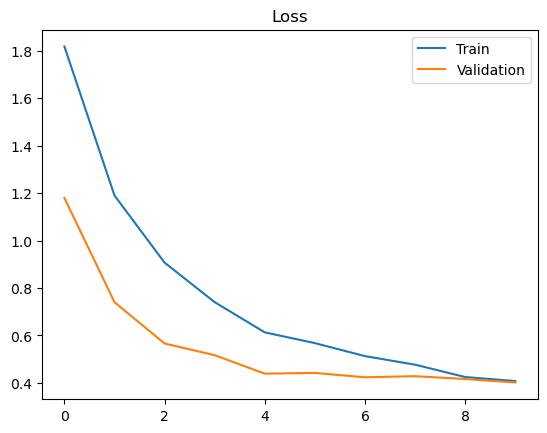

In [86]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()


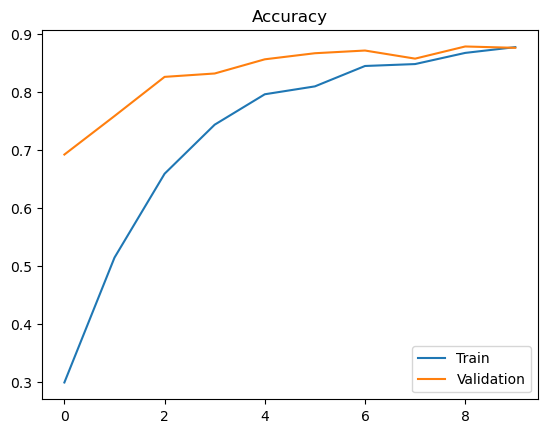

In [87]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

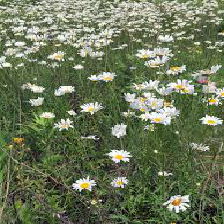

In [101]:
img = tf.keras.preprocessing.image.load_img('C:/Users/rrhoden/AppData/Local/anaconda3/input/FlowersRecognition/flowers/test3.jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [102]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 0s 130ms/step
[[9.7598529e-01 2.0017274e-02 8.4306579e-05 3.4471727e-03 4.6600320e-04]]


In [103]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)
# transform classes number into classes name
labels[class_id.item()]

[0]


'daisy'

In [97]:
model.save('C:/Users/rrhoden/workspace/saved_model/my_model')

INFO:tensorflow:Assets written to: C:/Users/rrhoden/workspace/saved_model/my_model\assets


INFO:tensorflow:Assets written to: C:/Users/rrhoden/workspace/saved_model/my_model\assets
